<a href="https://colab.research.google.com/github/Prakhyathg3/Prakhyath/blob/main/LR_Delivery_Time_Prediction_%3CPrakhyath%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [60]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [61]:
from google.colab import files
uploaded = files.upload()

Saving porter_data_1.csv to porter_data_1 (1).csv


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [62]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [63]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

print("\nAfter datetime conversion:")
print(df.dtypes)




After datetime conversion:
market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [64]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nAfter categorical conversion:")
print(df.dtypes)




After categorical conversion:
market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [65]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

print("\nTime taken statistics:")
print(df['time_taken'].describe())



Time taken statistics:
count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [66]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create isWeekend feature (Saturday=5, Sunday=6)
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

print("\nNew features created:")
print(df[['created_at', 'hour', 'day_of_week', 'isWeekend']].head())







New features created:
           created_at  hour  day_of_week isWeekend
0 2015-02-06 22:24:17    22            4         0
1 2015-02-10 21:49:25    21            1         0
2 2015-02-16 00:11:35     0            0         0
3 2015-02-12 03:36:46     3            3         0
4 2015-01-27 02:12:36     2            1         0


In [67]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

print("\nFinal dataset shape:", df.shape)
print("Columns:", df.columns.tolist())



Final dataset shape: (175777, 16)
Columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'hour', 'day_of_week', 'isWeekend']


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [68]:
# Define target variable (y) and features (X)
X = df.drop('time_taken', axis=1)
y = df['time_taken']

print("\nFeatures(x) :", X.shape)
print("Target variable(y):", y.shape)




Features(x) : (175777, 15)
Target variable(y): (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [69]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (140621, 15)
Test set size: (35156, 15)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [70]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print("\nNumerical columns:", num_cols)
print("Categorical columns:", cat_cols)



Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

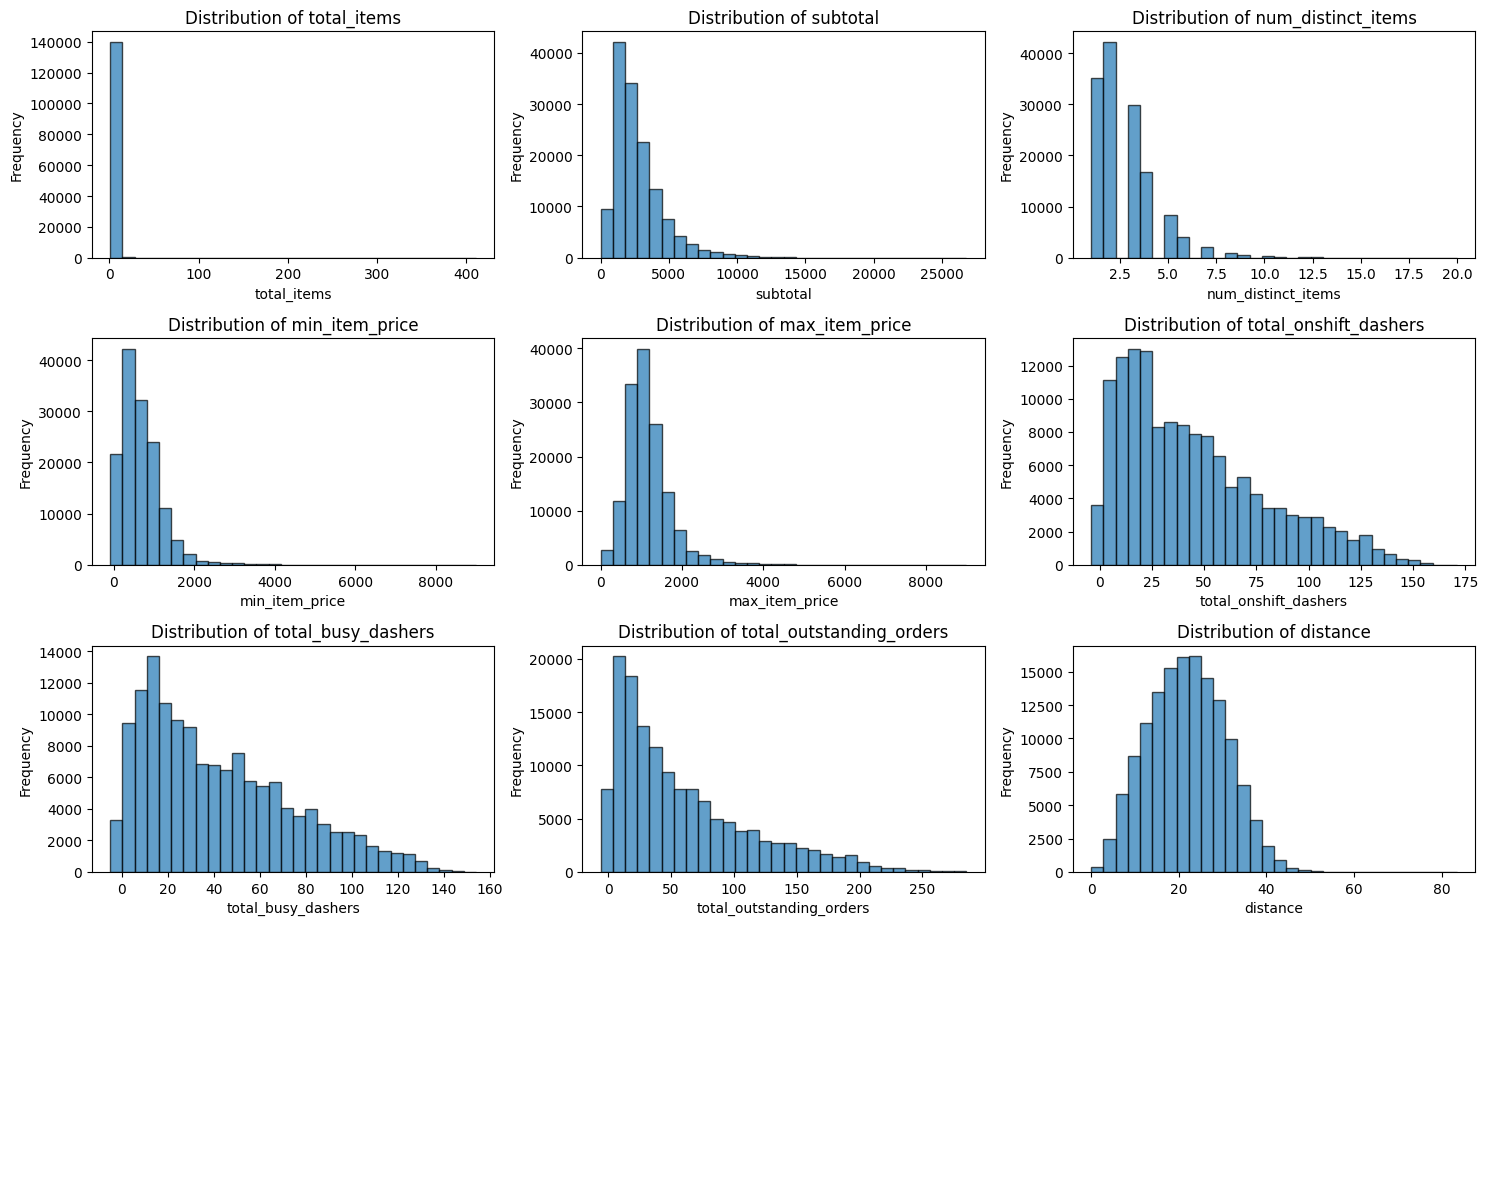

In [71]:
# Plot distributions for all numerical columns
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    axes[idx].hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(len(num_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

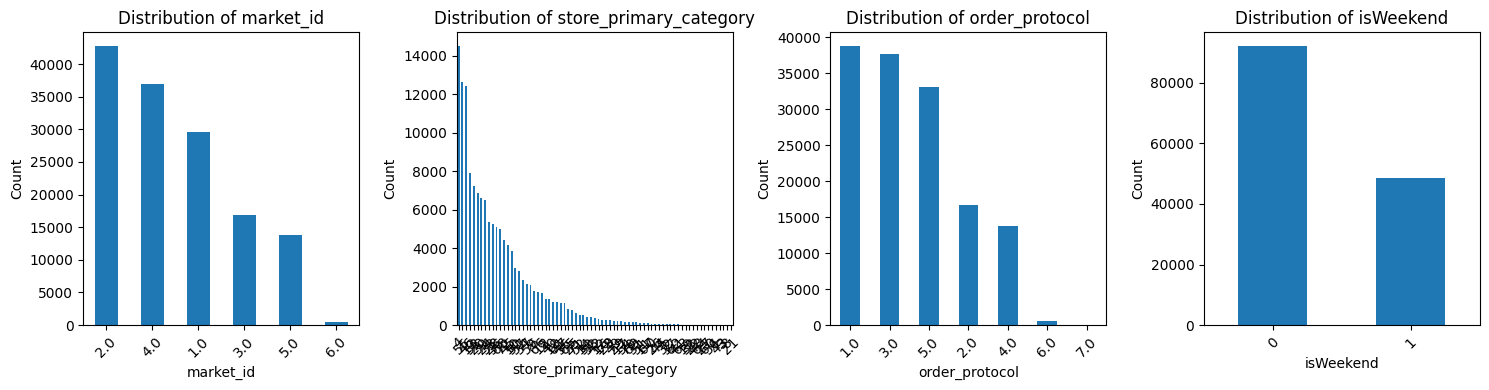

In [72]:
# Distribution of categorical columns
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 4))
if len(cat_cols) == 1:
    axes = [axes]

for idx, col in enumerate(cat_cols):
    X_train[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

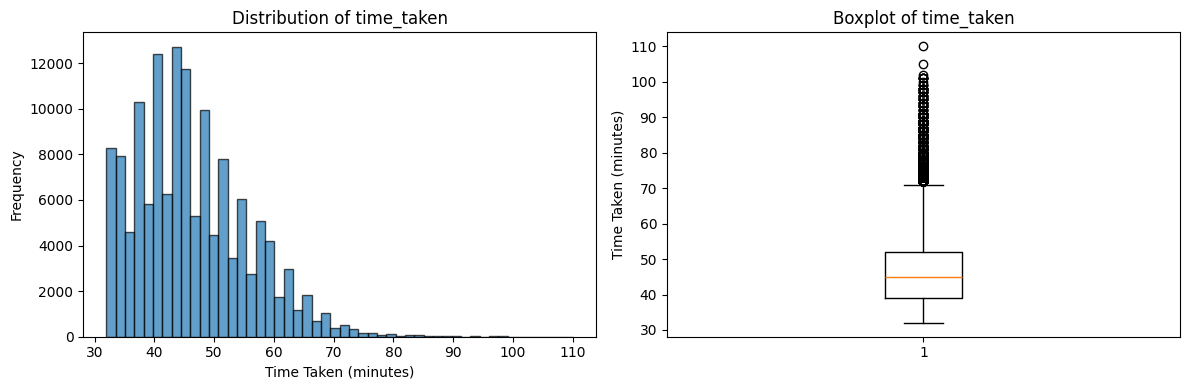


Target variable statistics:
count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64


In [73]:
# Distribution of time_taken
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y_train)
plt.title('Boxplot of time_taken')
plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTarget variable statistics:")
print(y_train.describe())




#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

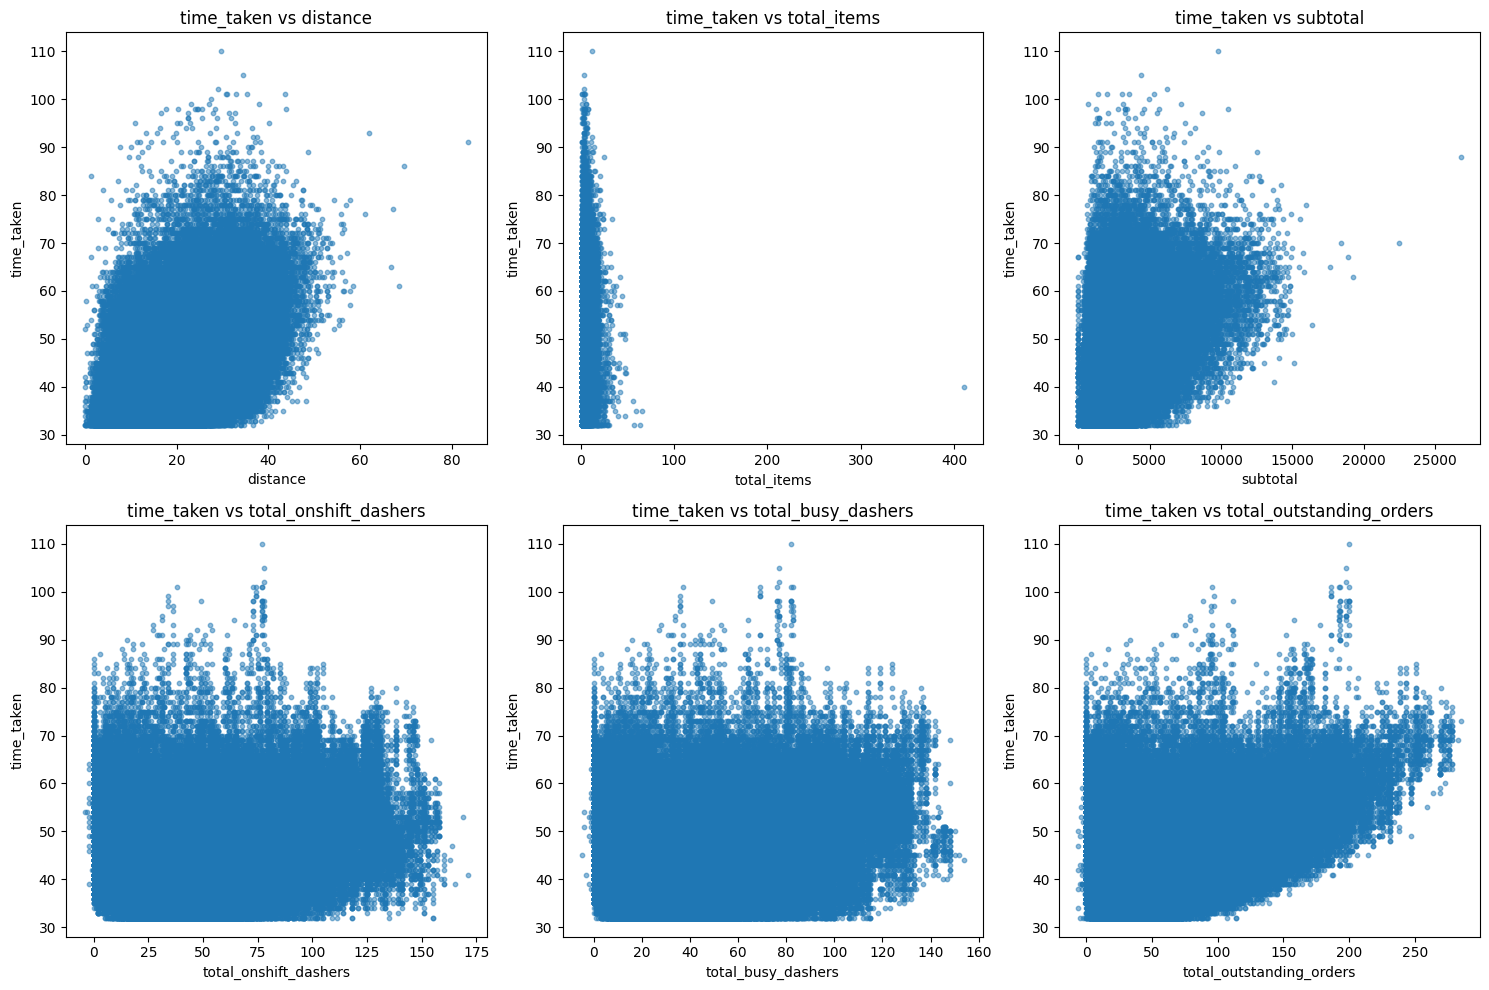

In [74]:
# Scatter plot to visualise the relationship between time_taken and other features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

scatter_cols = ['distance', 'total_items', 'subtotal',
                'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

for idx, col in enumerate(scatter_cols):
    if col in X_train.columns:
        axes[idx].scatter(X_train[col], y_train, alpha=0.5, s=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('time_taken')
        axes[idx].set_title(f'time_taken vs {col}')
    else:
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()



<Figure size 1200x600 with 0 Axes>

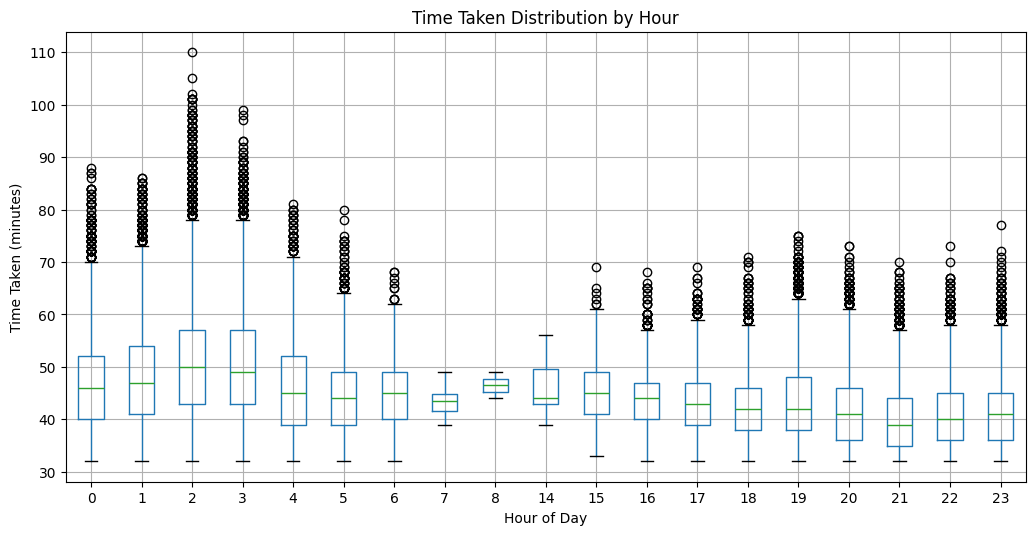

In [75]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
hour_data = pd.DataFrame({'hour': X_train['hour'], 'time_taken': y_train})
hour_data.boxplot(column='time_taken', by='hour', figsize=(12, 6))
plt.title('Time Taken Distribution by Hour')
plt.suptitle('')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.savefig('time_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

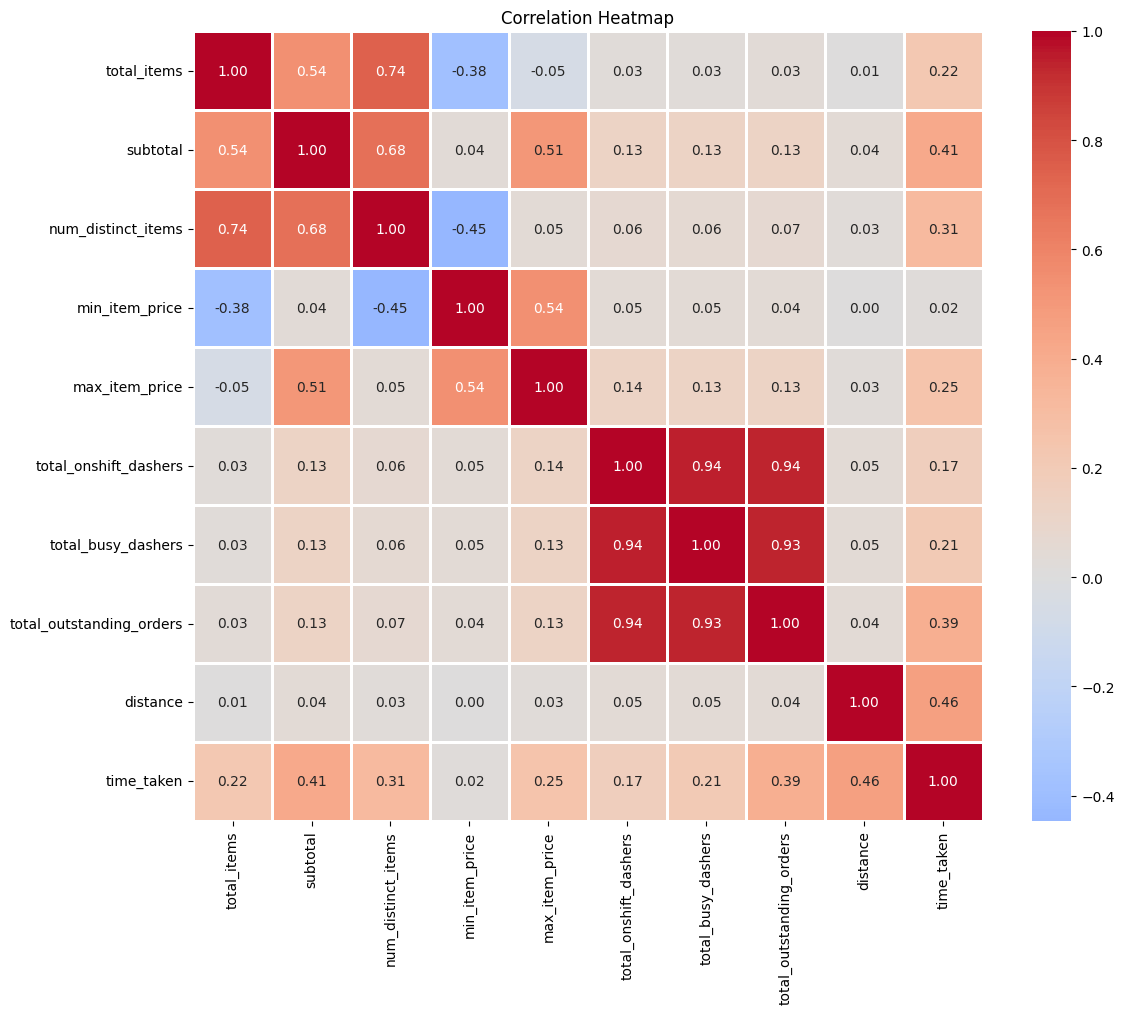


Correlation with target variable:
time_taken                  1.000000
distance                    0.461026
subtotal                    0.413392
total_outstanding_orders    0.385028
num_distinct_items          0.312510
max_item_price              0.254650
total_items                 0.220804
total_busy_dashers          0.206514
total_onshift_dashers       0.171828
min_item_price              0.021151
Name: time_taken, dtype: float64


In [76]:
# Plot the heatmap of the correlation matrix
train_data = X_train.copy()
train_data['time_taken'] = y_train

# Calculate correlation matrix for numerical columns
corr_matrix = train_data[num_cols + ['time_taken']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelation with target variable:")
print(corr_matrix['time_taken'].sort_values(ascending=False))




##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [77]:
# Drop 3-5 weakly correlated columns from training dataset
weak_corr_cols = corr_matrix['time_taken'][
    (abs(corr_matrix['time_taken']) < 0.1) &
    (corr_matrix.index != 'time_taken')
].index.tolist()

print(f"\nDropping weakly correlated columns: {weak_corr_cols}")

X_train = X_train.drop(weak_corr_cols, axis=1)
X_test = X_test.drop(weak_corr_cols, axis=1)

print(f"Remaining features: {X_train.columns.tolist()}")




Dropping weakly correlated columns: ['min_item_price']
Remaining features: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

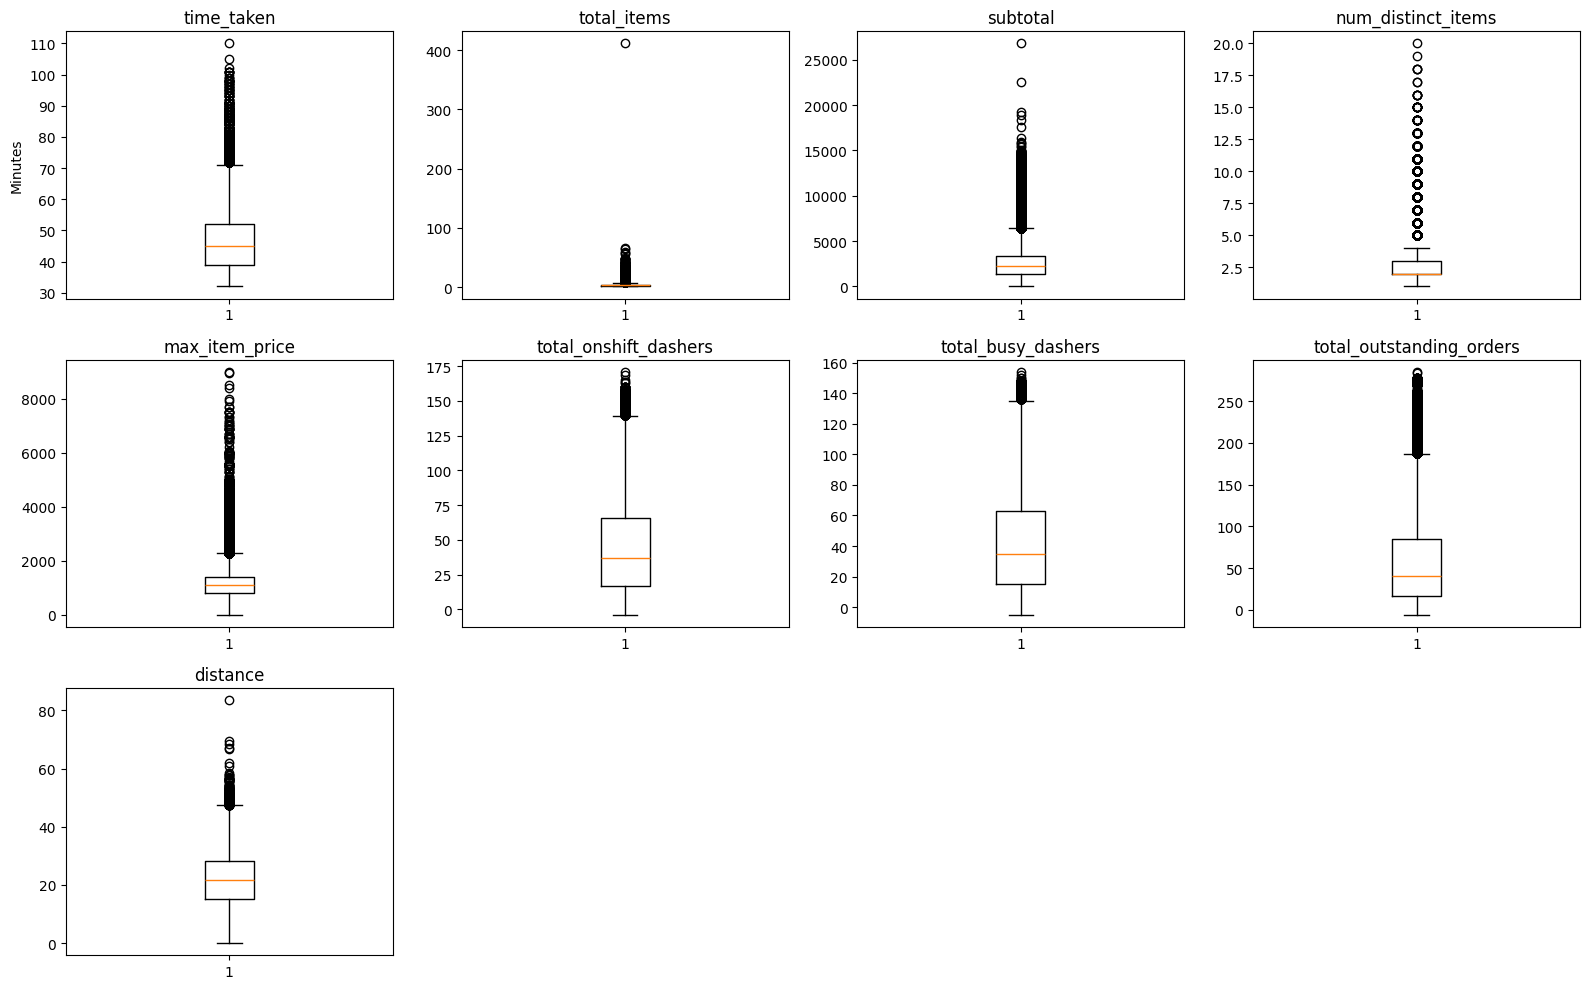

In [78]:
# Boxplot for time_taken
num_cols_updated = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

# Boxplot for time_taken
axes[0].boxplot(y_train)
axes[0].set_title('time_taken')
axes[0].set_ylabel('Minutes')

# Boxplots for numerical features
for idx, col in enumerate(num_cols_updated, 1):
    if idx < len(axes):
        axes[idx].boxplot(X_train[col])
        axes[idx].set_title(col)

for idx in range(len(num_cols_updated) + 1, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [79]:
# Handle outliers
def remove_outliers_iqr(X_df, y_series, threshold=1.5):
    """Remove outliers using IQR method"""
    X_clean = X_df.copy()
    y_clean = y_series.copy()

    # Get numerical columns
    num_cols = X_clean.select_dtypes(include=['int64', 'float64']).columns

    # Combine with target for outlier detection
    combined = X_clean.copy()
    combined['time_taken'] = y_clean

    # Check all numerical columns including target
    cols_to_check = list(num_cols) + ['time_taken']

    mask = pd.Series([True] * len(combined), index=combined.index)

    for col in cols_to_check:
        Q1 = combined[col].quantile(0.25)
        Q3 = combined[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Create mask for this column
        col_mask = (combined[col] >= lower_bound) & (combined[col] <= upper_bound)
        mask = mask & col_mask

        outliers_removed = (~col_mask).sum()
        print(f"{col}: {outliers_removed} outliers detected")

    # Apply mask
    X_clean = X_clean[mask]
    y_clean = y_clean[mask]

    return X_clean, y_clean

print("\nRemoving outliers...")
print(f"Original training size: {len(X_train)}")

X_train, y_train = remove_outliers_iqr(X_train, y_train, threshold=1.5)

print(f"Training size after outlier removal: {len(X_train)}")




Removing outliers...
Original training size: 140621
total_items: 6803 outliers detected
subtotal: 6474 outliers detected
num_distinct_items: 16678 outliers detected
max_item_price: 5515 outliers detected
total_onshift_dashers: 972 outliers detected
total_busy_dashers: 366 outliers detected
total_outstanding_orders: 4184 outliers detected
distance: 264 outliers detected
time_taken: 1379 outliers detected
Training size after outlier removal: 112292


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

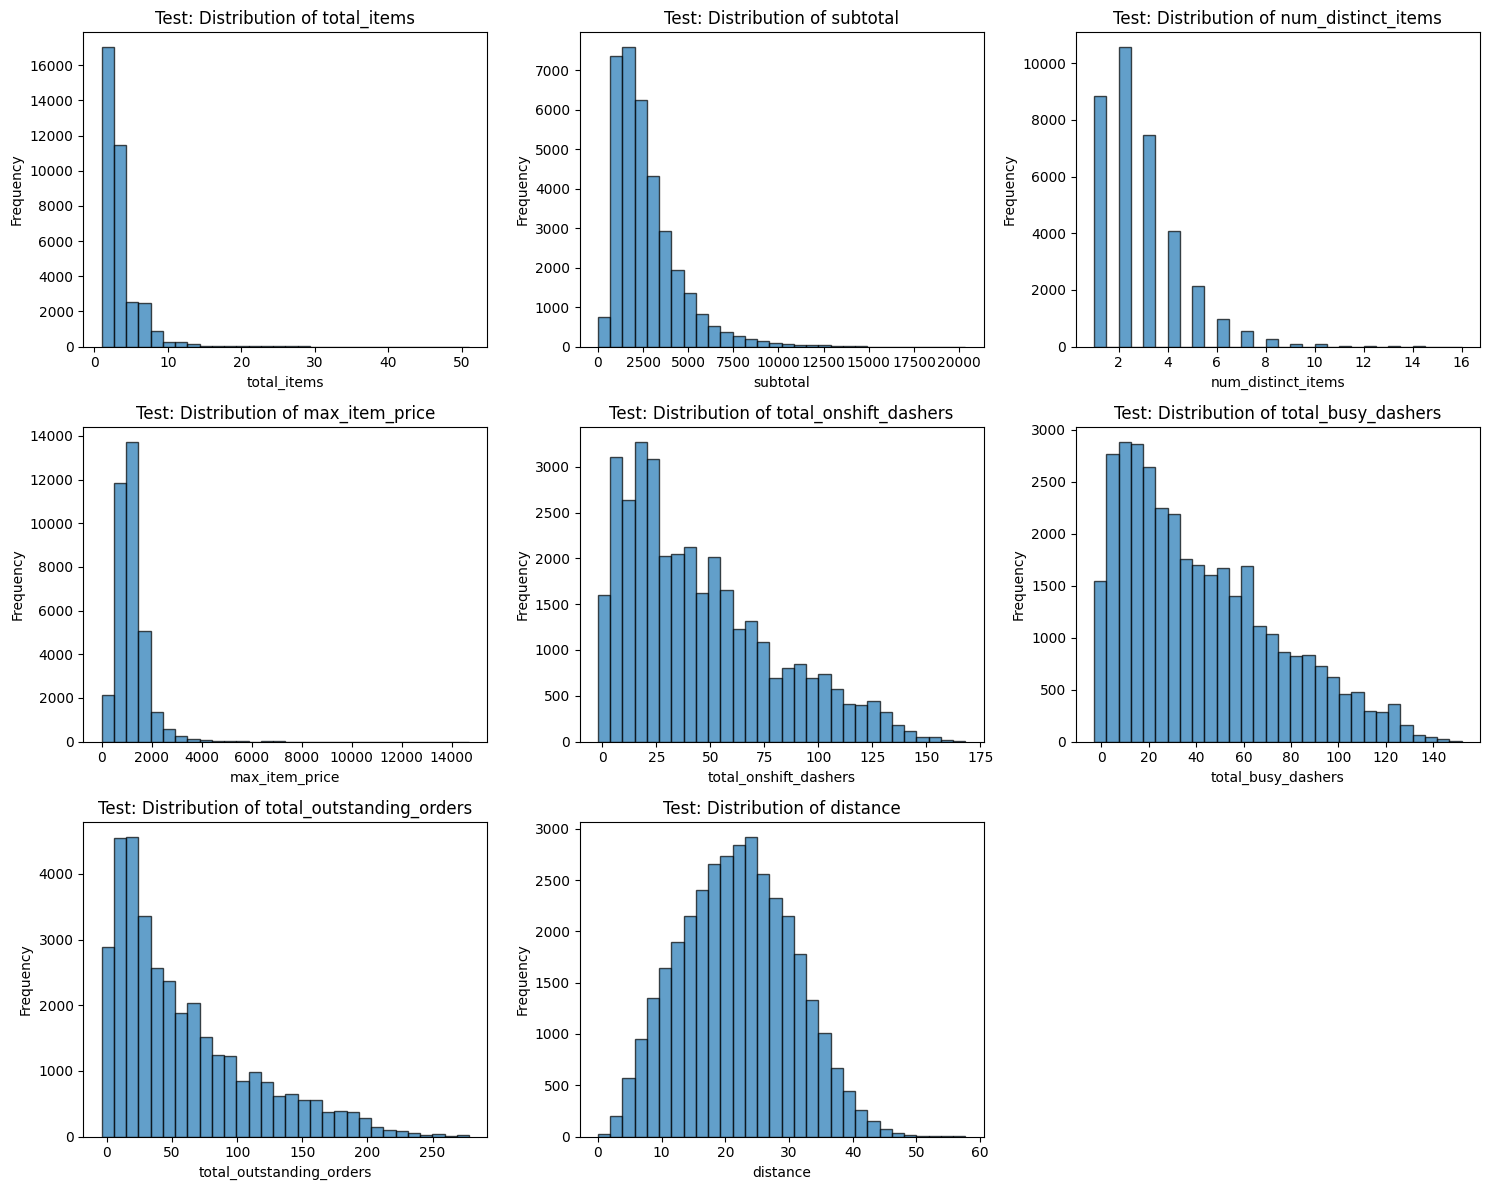

In [80]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Reusing num_cols_updated from previous section, as columns are consistent after dropping weak correlations
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols_updated):
    if idx < len(axes):
        axes[idx].hist(X_test[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Test: Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

for idx in range(len(num_cols_updated), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('test_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

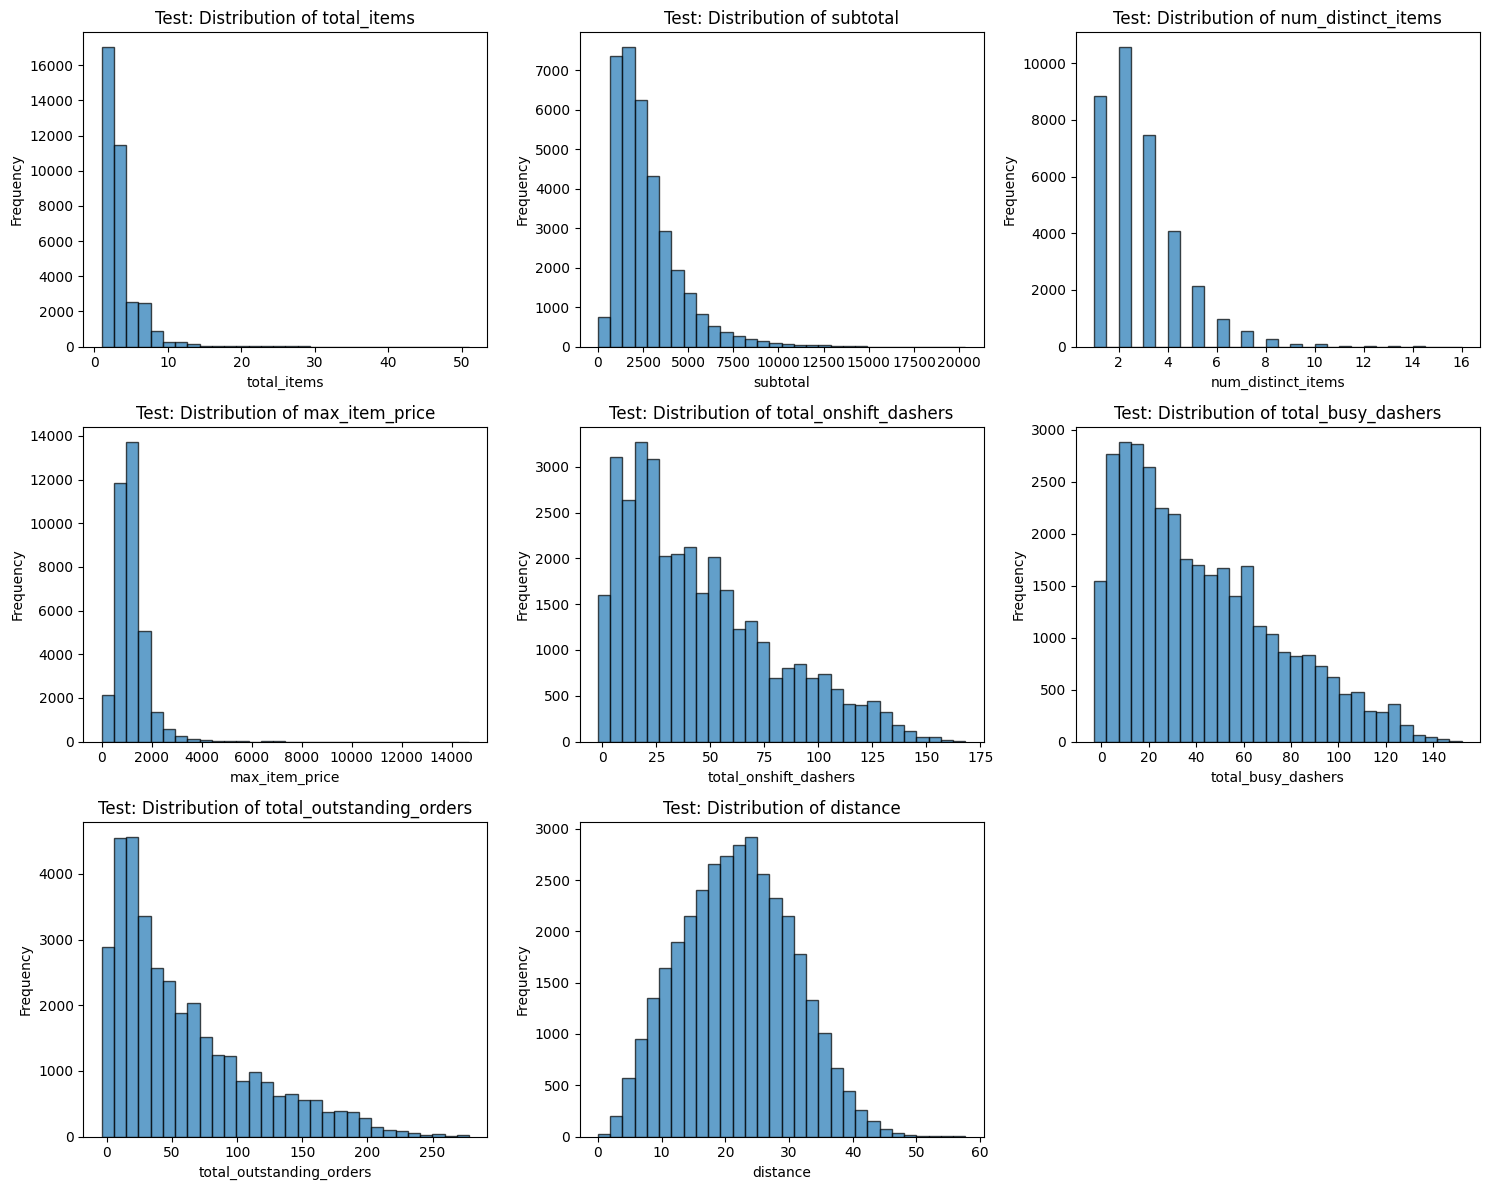

In [81]:
# Plot distributions for all numerical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols_updated):
    if idx < len(axes):
        axes[idx].hist(X_test[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Test: Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

for idx in range(len(num_cols_updated), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('test_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


##### **4.1.2**
Check the distribution of categorical features

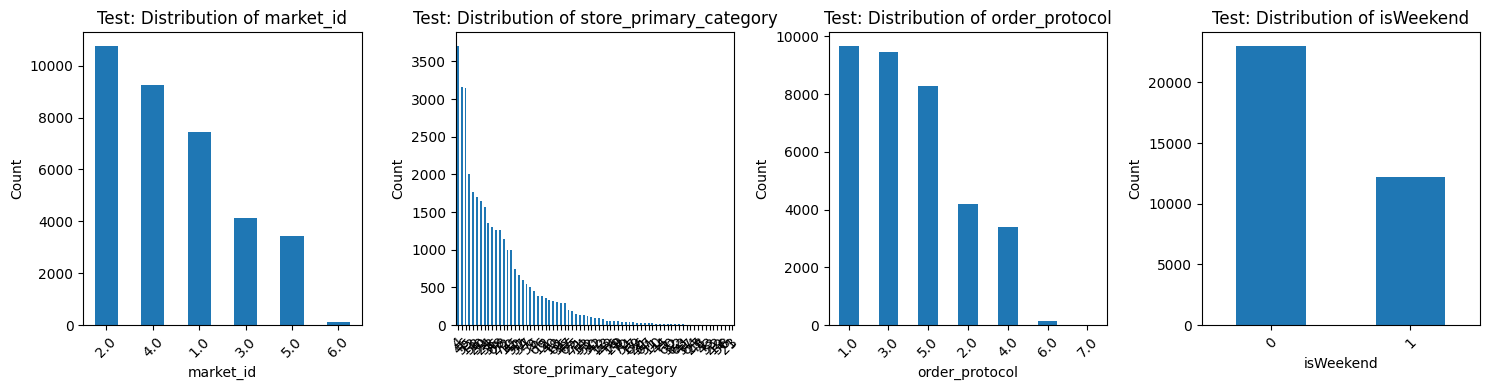

In [82]:
# Distribution of categorical columns
# Reusing cat_cols from previous section
if len(cat_cols) > 0:
    fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 4))
    if len(cat_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(cat_cols):
        X_test[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Test: Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('test_categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

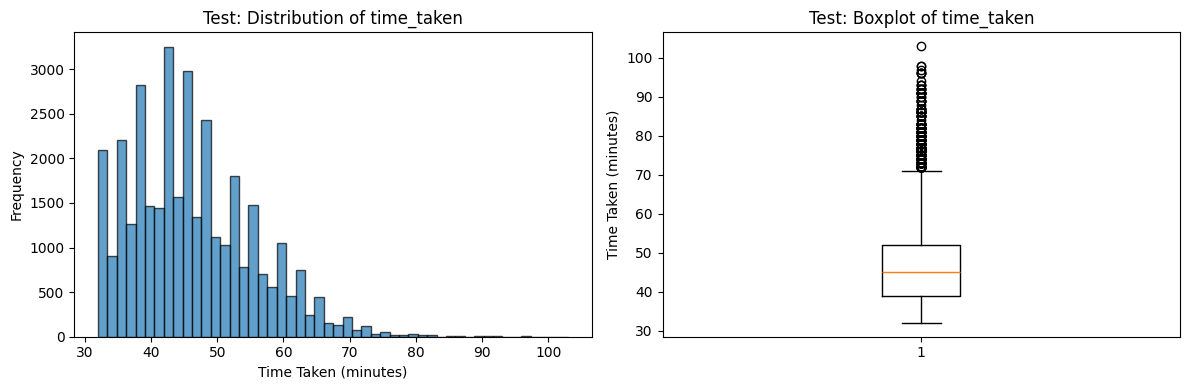

In [83]:
# Distribution of time_taken
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_test, bins=50, edgecolor='black', alpha=0.7)
plt.title('Test: Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y_test)
plt.title('Test: Boxplot of time_taken')
plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.savefig('test_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

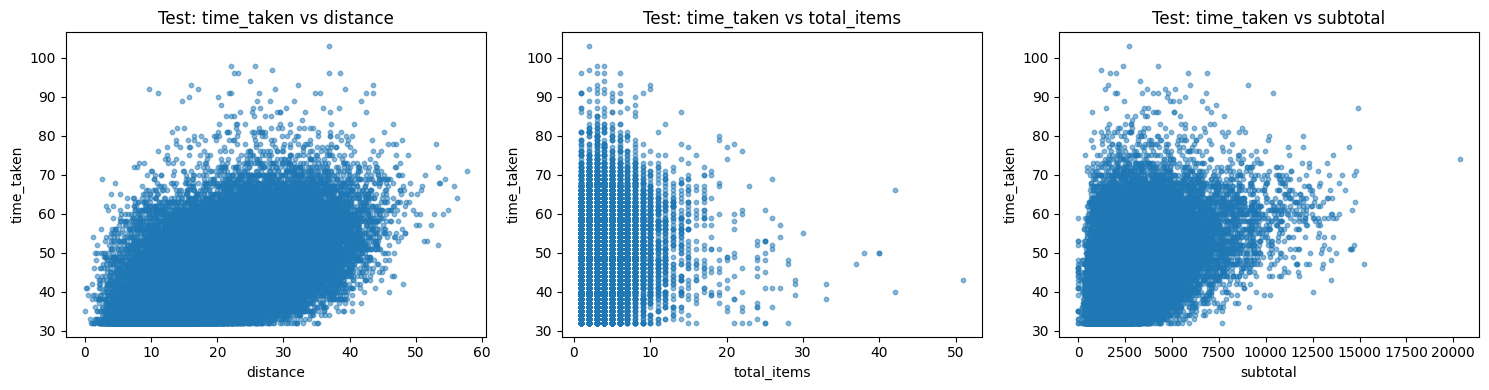

In [84]:
# Scatter plot to visualise the relationship between time_taken and other features
scatter_cols_test = [col for col in ['distance', 'total_items', 'subtotal'] if col in X_test.columns]

if len(scatter_cols_test) > 0:
    fig, axes = plt.subplots(1, len(scatter_cols_test), figsize=(15, 4))
    if len(scatter_cols_test) == 1:
        axes = [axes]

    for idx, col in enumerate(scatter_cols_test):
        axes[idx].scatter(X_test[col], y_test, alpha=0.5, s=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('time_taken')
        axes[idx].set_title(f'Test: time_taken vs {col}')

    plt.tight_layout()
    plt.savefig('test_scatter_plots.png', dpi=300, bbox_inches='tight')
    plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [85]:
# Drop the weakly correlated columns from training dataset
print(X_test.columns.tolist())



['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [86]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

print("\n" + "="*60)
print("MODEL BUILDING")
print("="*60)


MODEL BUILDING


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [87]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

# Fit on training data and transform
num_cols_final = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_final] = scaler.fit_transform(X_train[num_cols_final])
X_test_scaled[num_cols_final] = scaler.transform(X_test[num_cols_final])

print("Feature scaling completed")
print("\nScaled features sample:")
print(X_train_scaled.head())



Feature scaling completed

Scaled features sample:
       market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0    -1.202624 -1.194863   
94576        4.0                     20            3.0    -1.202624 -1.041327   
49784        1.0                     36            3.0     1.165825 -0.124495   
37753        3.0                     39            1.0    -0.413141  0.170294   
91728        2.0                      6            1.0    -1.202624 -0.659679   

        num_distinct_items  max_item_price  total_onshift_dashers  \
102712           -1.211542       -0.821584              -0.201575   
94576            -1.211542       -0.196591               2.200078   
49784             1.804698       -0.446588              -1.130213   
37753            -0.206129        0.813397              -0.809993   
91728            -1.211542        0.615899               0.727064   

        total_busy_dashers  total_outstanding_o

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [88]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


model = LinearRegression()



In [89]:
# Train the model using the training data

model.fit(X_train, y_train)


LinearRegression()

In [90]:
# Make predictions
y_pred = model.predict(X_test)


In [91]:
# Find results for evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")



Mean Squared Error (MSE): 10.5250
Root Mean Squared Error (RMSE): 3.2442
R-squared (R2) Score: 0.8798


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [92]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize lists to store scores
r2_list = []
rmse_list = []
feature_range = range(1, X_train.shape[1] + 1)

# Loop through the number of features and test the model
for n in feature_range:
    # Initialize the base model
    model = LinearRegression()

    # Initialize RFE with n features
    rfe = RFE(estimator=model, n_features_to_select=n)

    # Fit RFE on the training data
    rfe.fit(X_train, y_train)

    # Make predictions
    y_pred = rfe.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store and print results
    r2_list.append(r2)
    rmse_list.append(rmse)
    print(f"Features: {n}, R2: {r2:.4f}, RMSE: {rmse:.4f}")



Features: 1, R2: -0.0175, RMSE: 9.4371
Features: 2, R2: 0.0988, RMSE: 8.8812
Features: 3, R2: 0.1140, RMSE: 8.8063
Features: 4, R2: 0.1197, RMSE: 8.7781
Features: 5, R2: 0.3235, RMSE: 7.6949
Features: 6, R2: 0.3409, RMSE: 7.5953
Features: 7, R2: 0.7576, RMSE: 4.6065
Features: 8, R2: 0.7567, RMSE: 4.6150
Features: 9, R2: 0.8147, RMSE: 4.0268
Features: 10, R2: 0.8348, RMSE: 3.8028
Features: 11, R2: 0.8349, RMSE: 3.8011
Features: 12, R2: 0.8354, RMSE: 3.7958
Features: 13, R2: 0.8787, RMSE: 3.2580
Features: 14, R2: 0.8798, RMSE: 3.2442


In [93]:
# Build the final model with selected number of features


# Automatically pick the number of features with the best R2 score
optimal_n = feature_range[np.argmax(r2_list)]
print(f"Optimal number of features selected: {optimal_n}")

# Initialize the final model with the optimal number of features
final_model = LinearRegression()
rfe_final = RFE(estimator=final_model, n_features_to_select=optimal_n)

# Fit the final model on the training data
rfe_final.fit(X_train, y_train)

# Identify the names of the selected features
selected_mask = rfe_final.support_
# Assuming X_train is a DataFrame, we can get column names.
# If X_train is a numpy array, you might need a separate list of feature names.
selected_features = X_train.columns[selected_mask]

print("Selected Features:", list(selected_features))



Optimal number of features selected: 14
Selected Features: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [94]:
print("\n" + "="*60)
print("RESULTS AND INFERENCE")
print("="*60)


RESULTS AND INFERENCE



RESULTS AND INFERENCE


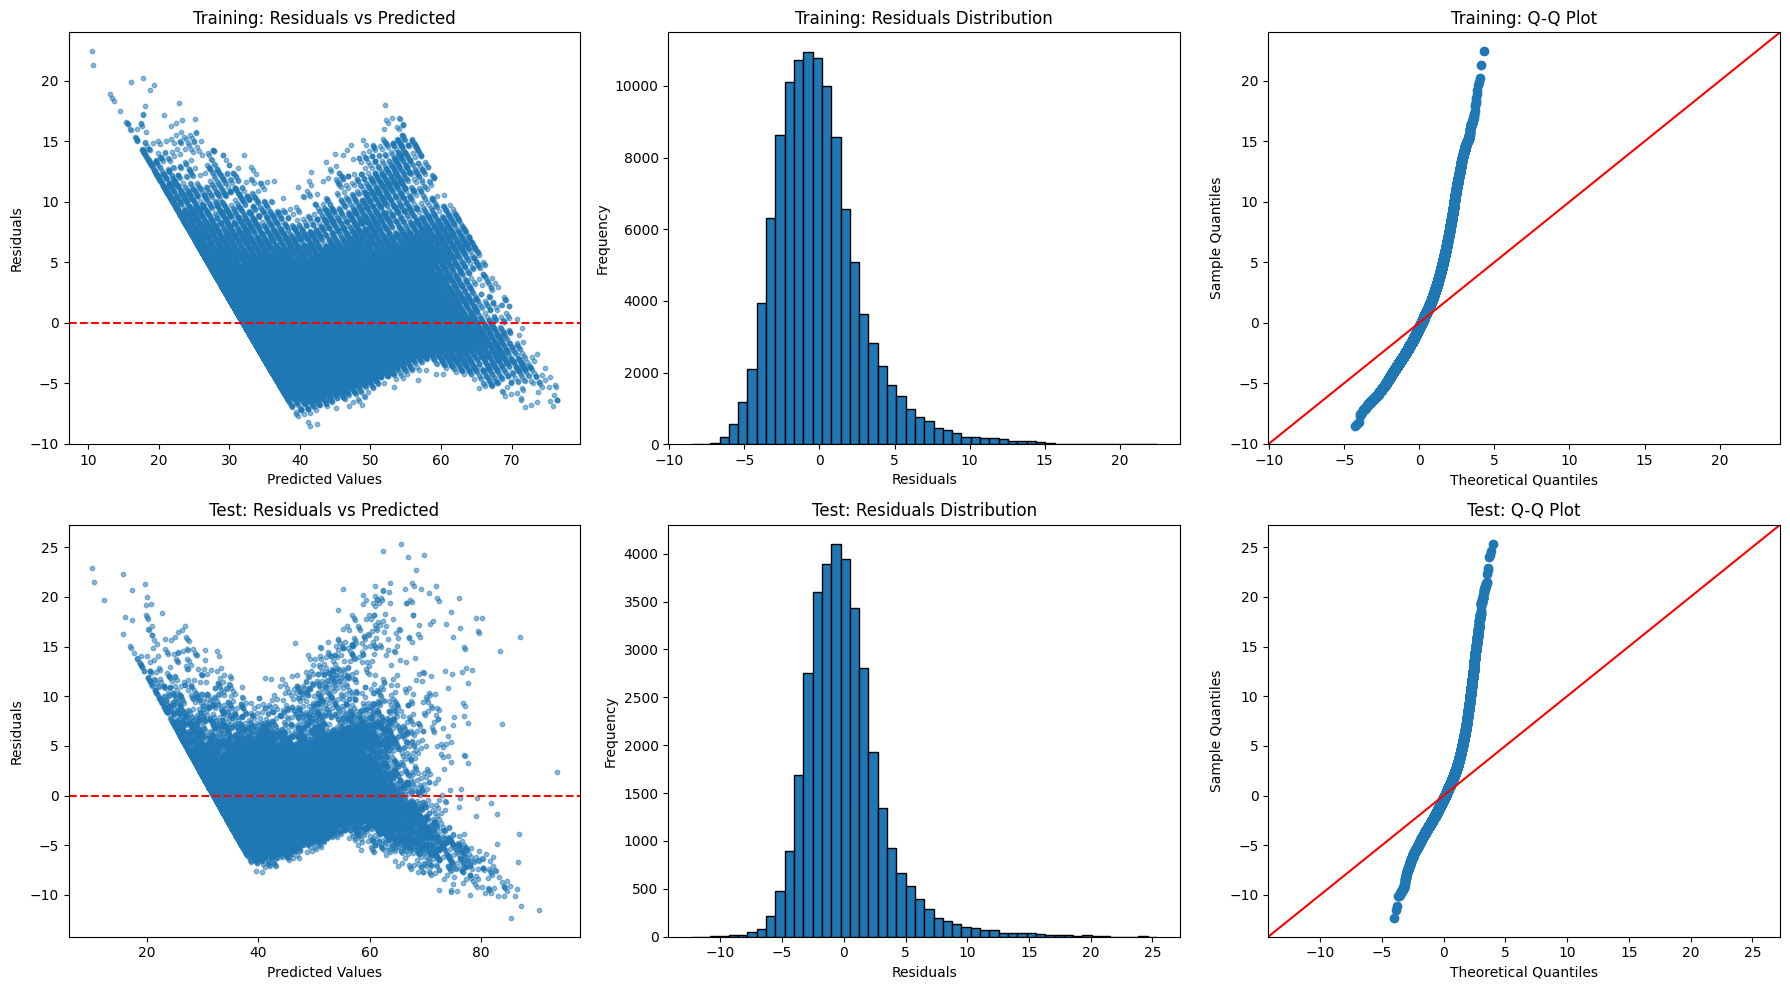


Residuals Statistics:
Training - Mean: -0.0000, Std: 2.9403
Test - Mean: 0.1109, Std: 3.2424


In [95]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
print("\n" + "="*60)
print("RESULTS AND INFERENCE")
print("="*60)

# Generate predictions from the final model
y_train_pred_final = rfe_final.predict(X_train)
y_test_pred_final = rfe_final.predict(X_test)

# 6.1 Residual Analysis
residuals_train = y_train - y_train_pred_final
residuals_test = y_test - y_test_pred_final

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Training residuals
axes[0, 0].scatter(y_train_pred_final, residuals_train, alpha=0.5, s=10)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Training: Residuals vs Predicted')

axes[0, 1].hist(residuals_train, bins=50, edgecolor='black')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Training: Residuals Distribution')

sm.qqplot(residuals_train, line='45', ax=axes[0, 2])
axes[0, 2].set_title('Training: Q-Q Plot')

# Test residuals
axes[1, 0].scatter(y_test_pred_final, residuals_test, alpha=0.5, s=10)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Test: Residuals vs Predicted')

axes[1, 1].hist(residuals_test, bins=50, edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Test: Residuals Distribution')

sm.qqplot(residuals_test, line='45', ax=axes[1, 2])
axes[1, 2].set_title('Test: Q-Q Plot')

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nResiduals Statistics:")
print(f"Training - Mean: {residuals_train.mean():.4f}, Std: {residuals_train.std():.4f}")
print(f"Test - Mean: {residuals_test.mean():.4f}, Std: {residuals_test.std():.4f}")

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [96]:
# Compare the scaled vs unscaled features used in the final model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# 1. Train a model on UN-SCALED (Original) data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)

# 2. Train a model on SCALED data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# 3. Create a comparison DataFrame
coeff_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Unscaled_Coeff': model_unscaled.coef_,
    'Scaled_Coeff': model_scaled.coef_
})

# Display the comparison
print("Comparison of Coefficients:")
print(coeff_comparison)



Comparison of Coefficients:
                     Feature  Unscaled_Coeff  Scaled_Coeff
0                  market_id       -0.577835     -0.774248
1     store_primary_category        0.004684      0.097978
2             order_protocol       -0.676373     -1.029967
3                total_items       -0.068743     -0.087074
4                   subtotal        0.001284      1.463739
5         num_distinct_items        0.502172      0.499468
6             max_item_price        0.000573      0.229068
7      total_onshift_dashers       -0.367839    -11.487054
8         total_busy_dashers       -0.138898     -4.072170
9   total_outstanding_orders        0.354463     15.999640
10                  distance        0.469764      4.068890
11                      hour       -0.232953     -2.058587
12               day_of_week       -0.030980     -0.062784
13                 isWeekend        1.595262      0.747758


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [97]:
# Analyze the effect of a unit change in a feature, say 'total_items'

target_feature = 'total_items'

# Find the index of the feature in the columns list
feat_idx = list(X_train.columns).index(target_feature)

# Extract the relevant values
scaled_beta = model_scaled.coef_[feat_idx]   # Coefficient from the scaled model
std_dev = scaler.scale_[feat_idx]            # Standard Deviation of the feature

# Calculate the effect of a 1-unit change in the original scale
# Formula: Effect = Scaled_Coefficient / Standard_Deviation
calculated_effect = scaled_beta / std_dev

print(f"--- Analysis for '{target_feature}' ---")
print(f"Scaled Coefficient: {scaled_beta:.4f}")
print(f"Standard Deviation of '{target_feature}': {std_dev:.4f}")
print(f"Effect of 1 unit increase (Calculated): {calculated_effect:.4f} minutes")
print(f"Effect of 1 unit increase (Direct Unscaled Coeff): {model_unscaled.coef_[feat_idx]:.4f} minutes")

print(f"\nInterpretation: Increasing '{target_feature}' by 1 unit increases delivery time by approx {calculated_effect:.2f} minutes.")



--- Analysis for 'total_items' ---
Scaled Coefficient: -0.0871
Standard Deviation of 'total_items': 1.2667
Effect of 1 unit increase (Calculated): -0.0687 minutes
Effect of 1 unit increase (Direct Unscaled Coeff): -0.0687 minutes

Interpretation: Increasing 'total_items' by 1 unit increases delivery time by approx -0.07 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, they do exist: the dataset contains market_id (location), store_primary_category (cuisine), and order_protocol (ordering mechanism).

 Market_id has an impact on time because traffic levels and route layouts differ between cities.

 Cuisine Impact: Store_primary_category is important since some foods (such as fast food) are prepared significantly faster than sophisticated recipes.

 Method Impact: order_protocol affects speed since automated orders are routed directly to the kitchen, whereas human orders take longer.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

The Split: This means that 20% of the data is held aside for testing, while the model learns from the remaining 80%.

 The Goal: It functions as a "final exam" with new questions.  We hide this data during training to demonstrate that the model can anticipate real-world orders it has never seen before, rather than simply memorizing the practice answers.

---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Feature Name: distance

Correlation Value: Approximately 0.46

Relationship: Strong Positive Correlation

Interpretation: As the distance between the restaurant and customer increases, the delivery time increases significantly. This is the most dominant numerical factor affecting the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Detection (The "Eyeball" & Math Test):

Visual Check: I used boxplots (the charts with the whiskers). Any dot sitting way above the top whisker stood out as a suspicious outlier—orders taking 3+ hours when the average is 45 minutes.

Math Check (IQR): I used the Interquartile Range (IQR) method. Think of this as drawing a "normal zone." I calculated the middle 50% of the data (Q1 to Q3) and established boundaries. Anything 1.5 times outside this safety zone was flagged as an outlier.

Action Taken:

Removal: I chose to remove these extreme outliers from the training data. Why? Because a delivery taking 5 hours usually means a system glitch or a rare accident, not a normal pattern we want our model to learn. Keeping them would confuse the model.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
# >Total Outstanding Orders:

What it means: The backlog. How many other people are waiting for food right now?

Impact: This was the #1 factor. If the queue is huge, your delivery slows down drastically. It’s the classic "lunch rush" effect.

# **Total On-Shift Dashers:**

What it means: The workforce. How many drivers are actually clocked in and working?

Impact: Surprisingly, this was also huge. More drivers on the road usually means faster service, but it also correlates with peak times (more drivers clock in when it's busy), making it a critical predictor.

# ***Total Busy Dashers:***

What it means: The active workforce. Of those drivers working, how many are currently stuck on a delivery?

Impact: If everyone is busy, there's nobody left to pick up your order. High "busyness" leads to immediate delays.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
* **The Core Concept:**
    * It acts like a "best-fit" ruler. Imagine scattering dots on a page; this algorithm tries to draw a single straight line that passes as close as possible to the center of all those dots.
* **The Formula ($y = mx + c$):**
    * It calculates a mathematical relationship using a **slope ($m$)** (e.g., how many minutes are added for every extra mile) and an **intercept ($c$)** (the baseline prep time even if distance is zero).
* **The Objective:**
    * It keeps adjusting the angle and position of this line until the total distance (error) between the line and the actual data points is as small as possible, ensuring accurate future predictions.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
# **>Simple Linear Regression:**

One-to-One: It uses only one single input to predict the outcome.

Example: Predicting delivery time based only on distance. It draws a simple 2D line.

# Multiple Linear Regression:

Many-to-One: It uses two or more inputs simultaneously to make a prediction.

Example: Predicting delivery time using distance, number of items, and traffic. It builds a more complex model that considers how these factors interact.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
# **>Role of Cost Function (The "Scorecard"):**

It measures how "wrong" the model is. It calculates the difference between the model's prediction and the actual reality (often using Mean Squared Error). A high score means a bad model; a low score means a good one.

# **Minimization (The Tuning Process):**

We use an algorithm called Gradient Descent. Imagine walking down a hill blindfolded—you feel the slope and take small steps downwards.

The model automatically adjusts its internal weights (like slope and intercept) in small steps to "walk down" the error hill until it reaches the bottom, where the error is minimized.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

# **>Overfitting (The "Memorizer"):**

What it is: The model learns the training data too perfectly, capturing noise and random spikes instead of the general trend.

Performance: It gets a near-perfect score on the training data but fails miserably on the test data (high variance).

Analogy: Like a student who memorizes the exact answers to the practice questions but fails the actual exam because the questions are slightly changed.

# **Underfitting (The "Oversimplified"):**

What it is: The model is too simple to capture the underlying pattern of the data.

Performance: It performs poorly on both the training data and the test data (high bias).

Analogy: Like trying to fit a straight straight ruler to a curved road; it fails to describe the path accurately at all.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
# >**The "Randomness" Check (Good):**

If the dots are scattered randomly around the horizontal zero line (like a cloud of dust), it means the model is healthy. The errors are just random noise, which is what we want.

# **The "Pattern" Check (Bad - Non-Linearity):**

If you see a clear shape (like a U-curve or a wave), it means the model missed a key pattern. You likely used a straight line for data that is actually curved.

# The "Funnel" Check (Bad - Uneven Variance):

If the dots spread out wider and wider like a cone or funnel as you go from left to right, it means the model becomes less reliable/stable for larger prediction values (a problem called heteroscedasticity).